In this notebook, we treat each of the limit cases presented in Section 3 of *Guéant O., Lehalle CA., Fernandez Tapia J. (2012)*. We will compute the optimal quotes both with the analytical solution of each limit case and with the general solution with a limit value of the selected parameter. 

We compare the results at t = 0 for clarity, but the results have been checked for the whole trading period.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import *

In [2]:
# We'll compare for q = 1,...,q_max
q_values = np.arange(1, 7)

### Special Case 3.1: Asymptotic T -> +∞

In [3]:
def analytical_asymptotic_quote(q, A, k, gamma, alpha, beta):
    return (1/k) * np.log( A/(1+gamma/k) / (alpha * q**2 - beta * q) )

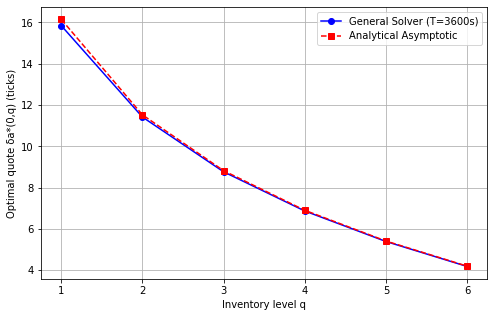

In [ ]:
# Use a large time horizon
T_large = 3600 # e.g. 1 hour
N_large = 500
dt_large = T_large / N_large

# Set parameters (use μ=0, σ as usual)
k_val = 0.3
gamma_val = 0.05
A_val = 0.1
b_val = 3
mu_val = 0
sigma_val = 0.3

# Compute derived parameters
alpha_val = 0.5 * k_val * gamma_val * sigma_val**2
beta_val = k_val * mu_val
eta_val = A_val * (1+gamma_val/k_val)**(-(1+k_val/gamma_val))

# Compute general optimal quotes (using general equation) at t = 0
quotes_general = compute_optimal_quote(6, N_large, k_val, b_val, alpha_val, beta_val, gamma_val, eta_val, dt_large)
general_quotes_case1 = quotes_general[1:, 0]  # for q=1,...,6

# Analytical formula
analytical_quotes_case1 = np.array([analytical_asymptotic_quote(q, A_val, k_val, gamma_val, alpha_val, beta_val) for q in q_values])

plt.figure(figsize=(8,5))
plt.plot(q_values, general_quotes_case1, 'bo-', label='General Solver (T=3600s)')
plt.plot(q_values, analytical_quotes_case1, 'rs--', label='Analytical Asymptotic')
plt.xlabel('Inventory level q')
plt.ylabel('Optimal quote δa*(0,q) (ticks)')
# plt.title('Case 3.1: T → ∞')
plt.legend()
plt.grid(True)
plt.savefig("./Figures/3_1.png")

### Special Case 3.2: No Drift/No Volatility (σ = μ = 0)

In [5]:
def analytical_no_vol_quote(t, q, b, k, gamma, eta, T):
    if q == 0:
        return None
    numerator = (eta**q / np.math.factorial(q)) * (T-t)**q
    denominator = 0
    for j in range(q):
        denominator += (eta**j / np.math.factorial(j)) * np.exp(-k * b * (q-j)) * (T-t)**j
    return -b + (1/k)*np.log(1 + numerator/denominator) + (1/gamma)*np.log(1+gamma/k)


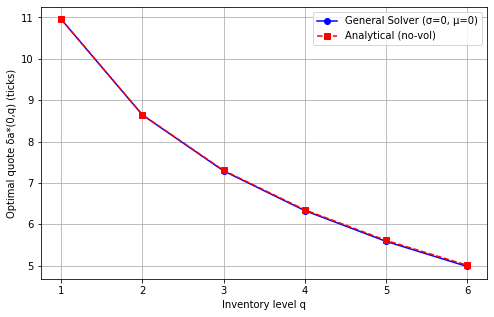

In [6]:
# Set σ = 0 and μ = 0. Use T = 300s as before.
T_no_vol = 300.0
N_no_vol = 500
dt_no_vol = T_no_vol / N_no_vol
# With σ=0, we have α = 0 and β = 0.
alpha_no_vol = 0
beta_no_vol = 0
# We still use our general solver to compute quotes.
quotes_general_no_vol = compute_optimal_quote(6, N_no_vol, k_val, b_val, alpha_no_vol, beta_no_vol, gamma_val, eta_val, dt_no_vol)
general_quotes_case2 = quotes_general_no_vol[1:, 0]  # at t=0

# Analytical formula
analytical_quotes_case2 = np.array([analytical_no_vol_quote(0, q, b_val, k_val, gamma_val, eta_val, T_no_vol) for q in q_values])

plt.figure(figsize=(8,5))
plt.plot(q_values, general_quotes_case2, 'bo-', label='General Solver (σ=0, μ=0)')
plt.plot(q_values, analytical_quotes_case2, 'rs--', label='Analytical (no-vol)')
plt.xlabel('Inventory level q')
plt.ylabel('Optimal quote δa*(0,q) (ticks)')
# plt.title('Case 3.2: No Drift / No Volatility')
plt.legend()
plt.grid(True)
plt.savefig("./Figures/3_2.png")

### Special Case 3.3: b -> +∞ (no-vol, no-drift)

In [7]:
def analytical_b_infty_quote(t, q, k, gamma, A, T):
    return (1/k)*np.log( A/(1+gamma/k) * (1 / q) * (T-t))

c:\Users\andre\OneDrive\Escritorio\M2QF Paris-Saclay\Asignaturas\2do Cuatri\Stochastic Control\Project\methods.py:43: RuntimeWarning: divide by zero encountered in log
  optimal_quotes[q] = (1/k) * np.log(w[q] / w[q-1]) + (1/gamma) * np.log(1 + gamma/k)
c:\Users\andre\OneDrive\Escritorio\M2QF Paris-Saclay\Asignaturas\2do Cuatri\Stochastic Control\Project\methods.py:43: RuntimeWarning: invalid value encountered in divide
  optimal_quotes[q] = (1/k) * np.log(w[q] / w[q-1]) + (1/gamma) * np.log(1 + gamma/k)


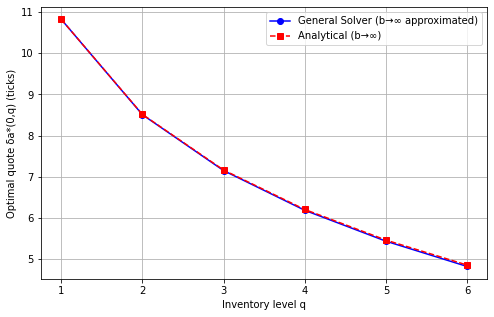

In [ ]:
# We take b very large and use the no-vol case (σ=0, μ=0)
b_large = 1e6
T_case3 = 300.0
N_case3 = 500
dt_case3 = T_case3 / N_case3
alpha_case3 = 0.0 # since σ=0
beta_case3 = 0.0  # since μ=0
# Use the general equation with b large
quotes_general_binf = compute_optimal_quote(6, N_case3, k_val, b_large, alpha_case3, beta_case3, gamma_val, eta_val, dt_case3)
general_quotes_case3 = quotes_general_binf[1:, 0]

# Analytical formula
analytical_quotes_case3 = np.array([analytical_b_infty_quote(0, q, k_val, gamma_val, A_val, T_case3) for q in q_values])

plt.figure(figsize=(8,5))
plt.plot(q_values, general_quotes_case3, 'bo-', label='General Solver (b→∞ approximated)')
plt.plot(q_values, analytical_quotes_case3, 'rs--', label='Analytical (b→∞)')
plt.xlabel('Inventory level q')
plt.ylabel('Optimal quote δa*(0,q) (ticks)')
# plt.title('Case 3.3: b → +∞ (No-vol)')
plt.legend()
plt.grid(True)
plt.savefig("./Figures/3_3.png")